# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.capitalize())
        countries.append(country.upper())


# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

1500
1500


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Create and preview a dataframe
city_df = pd.DataFrame({'City': cities,'Lat': "", 'Lng': "", 'Max Temp': "",'Humidity': "",
                             'Cloudiness': "", 'Country': countries, 'Windspeed': "",'Date': ""})

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Windspeed,Date
0,Oromocto,,,,,,CA,,
1,Saint george,,,,,,BM,,
2,Qaanaaq,,,,,,GL,,
3,Arman,,,,,,RU,,
4,Bredasdorp,,,,,,ZA,,


In [8]:

#response number count
rec_num = 1
rec_set = 1

#URL to get API from
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Going through each city
print('''Beginning Data Retrieval''')
for index, row in city_df.iterrows(): 
    #query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #in case the city is not found
    try: 
      
        print(f'Processing Weather Data for Record {rec_num} of Set {rec_set} | {response["name"]}')
        
        #populating dataframe
        city_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'Date'] = response['dt']
        city_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_df.loc[index, 'Lat'] = response['coord']['lat']
        city_df.loc[index, 'Lng'] = response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_df.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        rec_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #API call limits
    if rec_num == 51:
        rec_set += 1
        rec_num = 1
        time.sleep(60)
        
print('''Data Retrival Complete''')

Beginning Data Retrieval
Processing Weather Data for Record 1 of Set 1 | Oromocto
Processing Weather Data for Record 2 of Set 1 | Saint George
Processing Weather Data for Record 3 of Set 1 | Qaanaaq
Processing Weather Data for Record 4 of Set 1 | Arman'
Processing Weather Data for Record 5 of Set 1 | Bredasdorp
Processing Weather Data for Record 6 of Set 1 | Ushuaia
Processing Weather Data for Record 7 of Set 1 | Jamestown
Processing Weather Data for Record 8 of Set 1 | Nikolskoye
Processing Weather Data for Record 9 of Set 1 | Jamestown
Processing Weather Data for Record 10 of Set 1 | Hermanus
Processing Weather Data for Record 11 of Set 1 | Saint Paul Harbor
Processing Weather Data for Record 12 of Set 1 | Wattegama
Processing Weather Data for Record 13 of Set 1 | Chapada dos Guimarães
Processing Weather Data for Record 14 of Set 1 | Agirish
Processing Weather Data for Record 15 of Set 1 | Rikitea
Processing Weather Data for Record 16 of Set 1 | Hermanus
Processing Weather Data for R

Processing Weather Data for Record 28 of Set 3 | Linguère
Processing Weather Data for Record 29 of Set 3 | Araguaína
Processing Weather Data for Record 30 of Set 3 | Klaksvík
Processing Weather Data for Record 31 of Set 3 | Manakara
Processing Weather Data for Record 32 of Set 3 | Khatanga
Processing Weather Data for Record 33 of Set 3 | Hamilton
Processing Weather Data for Record 34 of Set 3 | Oussouye
Processing Weather Data for Record 35 of Set 3 | Georgetown
Processing Weather Data for Record 36 of Set 3 | Gamba
Processing Weather Data for Record 37 of Set 3 | Tsimmerbude
Processing Weather Data for Record 38 of Set 3 | Waipawa
Processing Weather Data for Record 39 of Set 3 | Punta Arenas
Processing Weather Data for Record 40 of Set 3 | Vaini
Processing Weather Data for Record 41 of Set 3 | Tuktoyaktuk
Processing Weather Data for Record 42 of Set 3 | Gua Musang
Processing Weather Data for Record 43 of Set 3 | Hermanus
Processing Weather Data for Record 44 of Set 3 | Ilulissat
Proce

Processing Weather Data for Record 11 of Set 6 | Ushuaia
Processing Weather Data for Record 12 of Set 6 | Jamestown
Processing Weather Data for Record 13 of Set 6 | Tynda
Processing Weather Data for Record 14 of Set 6 | Chirongui
City not found....Skipping............
Processing Weather Data for Record 15 of Set 6 | Khandyga
Processing Weather Data for Record 16 of Set 6 | Hithadhoo
Processing Weather Data for Record 17 of Set 6 | Busselton
Processing Weather Data for Record 18 of Set 6 | Kyra
Processing Weather Data for Record 19 of Set 6 | Ugep
Processing Weather Data for Record 20 of Set 6 | Vaini
City not found....Skipping............
Processing Weather Data for Record 21 of Set 6 | Hermanus
Processing Weather Data for Record 22 of Set 6 | Iquitos
Processing Weather Data for Record 23 of Set 6 | Bathsheba
Processing Weather Data for Record 24 of Set 6 | Busselton
Processing Weather Data for Record 25 of Set 6 | Poum
Processing Weather Data for Record 26 of Set 6 | Busselton
Process

Processing Weather Data for Record 38 of Set 8 | Yichang
Processing Weather Data for Record 39 of Set 8 | Barrow
Processing Weather Data for Record 40 of Set 8 | Caravelas
Processing Weather Data for Record 41 of Set 8 | Punta Arenas
City not found....Skipping............
Processing Weather Data for Record 42 of Set 8 | Severo-Kuril'sk
Processing Weather Data for Record 43 of Set 8 | Bathsheba
Processing Weather Data for Record 44 of Set 8 | Ushuaia
City not found....Skipping............
Processing Weather Data for Record 45 of Set 8 | Saskylakh
City not found....Skipping............
Processing Weather Data for Record 46 of Set 8 | Corbasca
Processing Weather Data for Record 47 of Set 8 | Samarai
Processing Weather Data for Record 48 of Set 8 | Vila Velha
Processing Weather Data for Record 49 of Set 8 | Swindon
City not found....Skipping............
Processing Weather Data for Record 50 of Set 8 | Chokurdakh
Processing Weather Data for Record 1 of Set 9 | Ushuaia
Processing Weather Dat

Processing Weather Data for Record 14 of Set 11 | Pisco
Processing Weather Data for Record 15 of Set 11 | Albany
Processing Weather Data for Record 16 of Set 11 | Labuhan
Processing Weather Data for Record 17 of Set 11 | Pangnirtung
Processing Weather Data for Record 18 of Set 11 | Rikitea
Processing Weather Data for Record 19 of Set 11 | Chui
Processing Weather Data for Record 20 of Set 11 | Kruisfontein
Processing Weather Data for Record 21 of Set 11 | Sai Buri
Processing Weather Data for Record 22 of Set 11 | Albany
Processing Weather Data for Record 23 of Set 11 | Lethem
City not found....Skipping............
Processing Weather Data for Record 24 of Set 11 | Nkayi
Processing Weather Data for Record 25 of Set 11 | Norman Wells
Processing Weather Data for Record 26 of Set 11 | Ahipara
Processing Weather Data for Record 27 of Set 11 | Ulladulla
Processing Weather Data for Record 28 of Set 11 | South Hill
Processing Weather Data for Record 29 of Set 11 | Carnarvon
Processing Weather Da

Processing Weather Data for Record 47 of Set 13 | Envira
Processing Weather Data for Record 48 of Set 13 | Kapaa
Processing Weather Data for Record 49 of Set 13 | Baruun-Urt
Processing Weather Data for Record 50 of Set 13 | Ternovka
City not found....Skipping............
Processing Weather Data for Record 1 of Set 14 | San Quintín
Processing Weather Data for Record 2 of Set 14 | Busselton
Processing Weather Data for Record 3 of Set 14 | Tuktoyaktuk
City not found....Skipping............
Processing Weather Data for Record 4 of Set 14 | Provideniya
Processing Weather Data for Record 5 of Set 14 | Arraial do Cabo
City not found....Skipping............
Processing Weather Data for Record 6 of Set 14 | Kavieng
Processing Weather Data for Record 7 of Set 14 | Albany
City not found....Skipping............
Processing Weather Data for Record 8 of Set 14 | Kavaratti
City not found....Skipping............
Processing Weather Data for Record 9 of Set 14 | Komsomol'skiy
Processing Weather Data for Re

Processing Weather Data for Record 20 of Set 16 | Khatanga
Processing Weather Data for Record 21 of Set 16 | Rikitea
Processing Weather Data for Record 22 of Set 16 | Kapaa
Processing Weather Data for Record 23 of Set 16 | Mar del Plata
Processing Weather Data for Record 24 of Set 16 | Barrow
Processing Weather Data for Record 25 of Set 16 | Dikson
Processing Weather Data for Record 26 of Set 16 | Camacha
Processing Weather Data for Record 27 of Set 16 | Sarangani
Processing Weather Data for Record 28 of Set 16 | Tautira
Processing Weather Data for Record 29 of Set 16 | Fairbanks
City not found....Skipping............
Processing Weather Data for Record 30 of Set 16 | Jamestown
Processing Weather Data for Record 31 of Set 16 | Albany
Processing Weather Data for Record 32 of Set 16 | Dikson
Processing Weather Data for Record 33 of Set 16 | Bethel
Processing Weather Data for Record 34 of Set 16 | Albany
Processing Weather Data for Record 35 of Set 16 | Albany
Processing Weather Data for R

Processing Weather Data for Record 1 of Set 19 | Pacifica
Processing Weather Data for Record 2 of Set 19 | Ilo
Processing Weather Data for Record 3 of Set 19 | Hofn
Processing Weather Data for Record 4 of Set 19 | Pacific Grove
Processing Weather Data for Record 5 of Set 19 | Vaini
Processing Weather Data for Record 6 of Set 19 | Qaanaaq
Processing Weather Data for Record 7 of Set 19 | Avarua
Processing Weather Data for Record 8 of Set 19 | Okato
Processing Weather Data for Record 9 of Set 19 | Bredasdorp
Processing Weather Data for Record 10 of Set 19 | Kapaa
Processing Weather Data for Record 11 of Set 19 | Casma
Processing Weather Data for Record 12 of Set 19 | Punta Arenas
Processing Weather Data for Record 13 of Set 19 | Port Blair
Processing Weather Data for Record 14 of Set 19 | Kapaa
Processing Weather Data for Record 15 of Set 19 | Vanavara
Processing Weather Data for Record 16 of Set 19 | Cermeño
Processing Weather Data for Record 17 of Set 19 | Busselton
Processing Weather D

Processing Weather Data for Record 34 of Set 21 | Taoudenni
Processing Weather Data for Record 35 of Set 21 | Cape Town
Processing Weather Data for Record 36 of Set 21 | Rikitea
Processing Weather Data for Record 37 of Set 21 | New Norfolk
Processing Weather Data for Record 38 of Set 21 | Severo-Kuril'sk
Processing Weather Data for Record 39 of Set 21 | São João da Barra
Processing Weather Data for Record 40 of Set 21 | Bluff
Processing Weather Data for Record 41 of Set 21 | Kapaa
Processing Weather Data for Record 42 of Set 21 | Jamestown
Processing Weather Data for Record 43 of Set 21 | Rikitea
Processing Weather Data for Record 44 of Set 21 | Grand Junction
Processing Weather Data for Record 45 of Set 21 | Vrangel'
Processing Weather Data for Record 46 of Set 21 | Yeppoon
Processing Weather Data for Record 47 of Set 21 | Mae Hong Son
City not found....Skipping............
Processing Weather Data for Record 48 of Set 21 | Provideniya
Processing Weather Data for Record 49 of Set 21 | 

Processing Weather Data for Record 10 of Set 24 | Karratha
Processing Weather Data for Record 11 of Set 24 | Saint Paul Harbor
Processing Weather Data for Record 12 of Set 24 | Arcata
Processing Weather Data for Record 13 of Set 24 | Hithadhoo
Processing Weather Data for Record 14 of Set 24 | Guarapari
Processing Weather Data for Record 15 of Set 24 | Kapit
Processing Weather Data for Record 16 of Set 24 | Kutum
Processing Weather Data for Record 17 of Set 24 | Busselton
Processing Weather Data for Record 18 of Set 24 | Touros
Processing Weather Data for Record 19 of Set 24 | Maxixe
Processing Weather Data for Record 20 of Set 24 | Ilulissat
Processing Weather Data for Record 21 of Set 24 | Shimoda
Processing Weather Data for Record 22 of Set 24 | Busselton
Processing Weather Data for Record 23 of Set 24 | Huilong
Processing Weather Data for Record 24 of Set 24 | Makkah al Mukarramah
Processing Weather Data for Record 25 of Set 24 | Vaini
Processing Weather Data for Record 26 of Set 24

Processing Weather Data for Record 40 of Set 26 | San Fernando del Valle de Catamarca
Processing Weather Data for Record 41 of Set 26 | Hobart
Processing Weather Data for Record 42 of Set 26 | Riyadh
Processing Weather Data for Record 43 of Set 26 | Manado
Processing Weather Data for Record 44 of Set 26 | Sawākin
Processing Weather Data for Record 45 of Set 26 | Shingū
Processing Weather Data for Record 46 of Set 26 | Lahaina
Processing Weather Data for Record 47 of Set 26 | Udachny
Processing Weather Data for Record 48 of Set 26 | Cherskiy
Processing Weather Data for Record 49 of Set 26 | Hermanus
Processing Weather Data for Record 50 of Set 26 | Mar del Plata
Processing Weather Data for Record 1 of Set 27 | Geraldton
Processing Weather Data for Record 2 of Set 27 | Brora
Processing Weather Data for Record 3 of Set 27 | Batemans Bay
Processing Weather Data for Record 4 of Set 27 | Yerofey Pavlovich
Processing Weather Data for Record 5 of Set 27 | Tamiahua
Processing Weather Data for R

## Convert Raw Data to DataFrame
* Save as csv

In [9]:
#Clean dataframe add NAN and remove it
city_df['Max Temp'] = city_df['Max Temp'].replace('', np.nan)
city_df = city_df.dropna()

#Save dataframe
city_df.to_csv("Output/CityData.csv", index=False, header=True)

#Preview the dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Country,Windspeed,Date
0,Oromocto,45.84,-66.48,52.00,71,90,CA,5.82,1603471314
1,Saint george,32.38,-64.68,80.01,83,75,BM,19.46,1603471314
2,Qaanaaq,77.48,-69.36,20.05,94,100,GL,9.6,1603471314
3,Arman,59.7,150.17,36.14,85,100,RU,10.25,1603471314
4,Bredasdorp,-34.53,20.04,72.00,77,41,ZA,4,1603471315


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

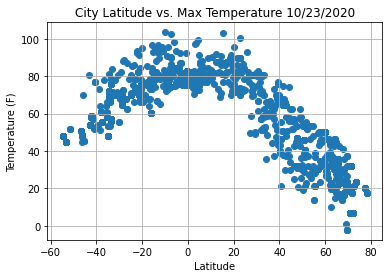

In [10]:
# scatter plot for Lat vs Max Temp
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")


plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()


### Latitude vs. Humidity Plot

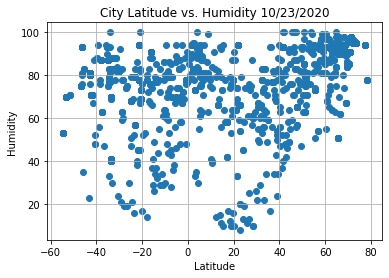

In [11]:
# scatter plot for Lat vs Humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")

plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

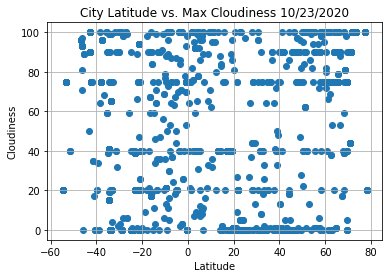

In [12]:

# scatter plot for lat vs cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")


plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

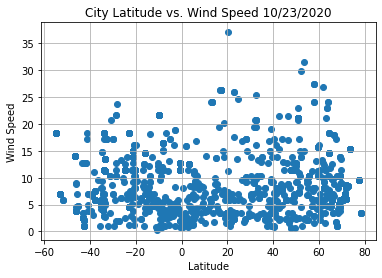

In [13]:
# scatter plot for Lat vs Windspeed
plt.scatter(city_df["Lat"], city_df["Windspeed"], marker="o")


plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression